Ideas:
Short
levrage
hourly

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('BTC_daily.csv')

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3157,2023-05-10,27654.636719,28322.687500,26883.669922,27621.755859,27621.755859,20656025026
3158,2023-05-11,27621.085938,27621.941406,26781.826172,27000.789062,27000.789062,16724343943
3159,2023-05-12,26987.662109,27055.646484,25878.429688,26804.990234,26804.990234,19313599897
3160,2023-05-13,26807.769531,27030.482422,26710.873047,26784.078125,26784.078125,9999171605


In [4]:
data = df['Close'].values

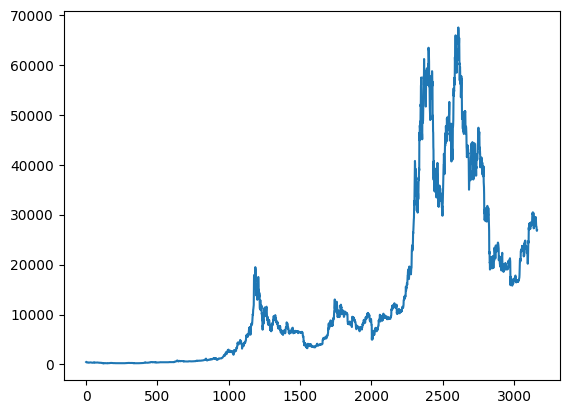

In [5]:
plt.plot(data)

In [6]:
data.shape

(3162,)

In [7]:
def SMA(n , dat):
    sma_list = [0] * (n - 1)
    for i in range(n, dat.shape[0]+1):
        sma_list.append(np.mean(dat[i-n:i]))
    return(sma_list)

In [8]:
def CUTS(sma1 , sma2): # sma1 shorter than sma2
    buy = []
    sell = []
    old = 1
    for i in range(len(sma1)):
        if (sma1[i]>=sma2[i]):
            new = 1
        else:
            new = -1
        if (old != new):
            if (new==-1) :
                sell.append(i)
            else:
                buy.append(i)
        old = new
    return buy , sell

In [9]:
def PROFITS (buys , sells , data):
    l = 3
    profit = []
    if (len(buys)>0):
        if buys[0] > sells[0]:
            for i in range(len(buys)):
                p =  ((data[sells[i]] - data[buys[i]])/data[buys[i]])*l
                profit.append(p)
                if (i!=(len(buys)-1)):
                    p = ((data[sells[i+1]] - data[buys[i]])/data[buys[i]])*l
                    profit.append(p)
        else :
            for i in range(len(buys)):
                p = ((data[sells[i]] - data[buys[i]])/data[buys[i]])*l
                profit.append(p)
    return profit

In [10]:
def RATE(profs):
    fees = 0.999
    if (len(profs)>0):
        numtrades = len(profs)
        maxdrawdown = min(profs) 
        #maxwin = max(profs)
        allprofit = 1
        #multiplyer = [1] # your money in time
        for i in profs:
            #multiplyer.append(allprofit * (1 + i) * fees)
            allprofit = allprofit * (1 + i)*fees
        return numtrades , maxdrawdown , allprofit 
    else:
        return 0 , 0 , 1

In [11]:
N = 1000
    
numtradess = np.zeros((N , 200 , 200) , dtype = float )
maxdrawdowns = np.zeros((N , 200 , 200) , dtype = float )
#maxwins = np.zeros((N , 300 , 300) , dtype = float )
allprofits = np.zeros((N , 200 , 200) , dtype = float )
# multiplyers[t-300 , i , j , 0:(len(profits)+1)]

for t in range(200 , 200+N):
    print(t)
    smas = np.zeros((200 , t) , dtype = float)
    #multiplyers = np.ones((N , 300 , 300 , t) , dtype = float )
    #maxwins[t-300][i][j]
    for i in range (200):
        smas [i , :] = SMA(i+1 , data[-t:])
    for i in range (200):
        for j in range (200):
            if (i<j):
                buys , sells = CUTS(smas[i , :] , smas[j , :])
                profits = PROFITS(buys , sells , data[-t:])
                numtradess[t-300][i][j] , maxdrawdowns[t-300][i][j] , allprofits[t-300][i][j] = RATE (profits)
            if (j<i):
                buys , sells = CUTS(smas[j , :] , smas[i , :])
                profits = PROFITS(buys , sells , data[-t:])
                numtradess[t-300][i][j] , maxdrawdowns[t-300][i][j] , allprofits[t-300][i][j]  = RATE (profits)

200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449


In [12]:
np.max(allprofits)

579.3525494736069

In [35]:
np.max(allprofits[: , 1 , 24])

14.647485056659816

In [15]:
avg = np.mean(allprofits , axis = 0)

In [16]:
np.max(avg)

73.99667766214242

In [18]:
avg[30][35]

73.99667766214242

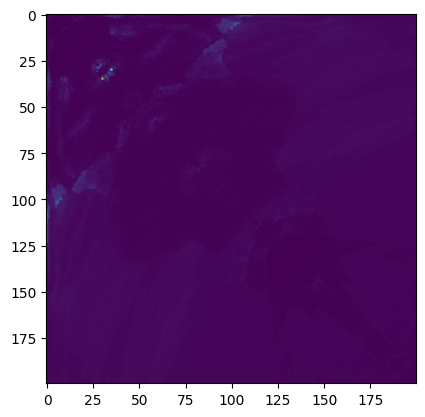

In [19]:
plt.imshow(avg)

In [20]:
maxrow, maxcol = np.unravel_index(np.argmax(avg), avg.shape)
print("Best avg combination: " + str(maxrow) + " , " + str(maxcol))

Best avg combination: 30 , 35


In [33]:
flattened_arr = avg.flatten()

# Get the indexes of the 20 largest numbers
indexes = np.argpartition(flattened_arr, -20)[-20:]

# Convert flat indexes to row and column indexes
row_indexes, col_indexes = np.unravel_index(indexes, avg.shape)

print(row_indexes)
print(col_indexes)

[101   6   7   0 100 102 110   0   5 112 108 109   0 111  30  35  29  28
   0   0]
[  6 101 100 110   7   5   0 112 102   0   0   0 108   0  35  30  28  29
 109 111]


In [21]:
ranks = np.zeros((N , 200 , 200) , dtype = float )
arr = allprofits.copy()
for i in range(N):
    flattened_arr = arr[i , : , :].flatten()

    # Get the ranked indexes
    ranked_indexes = np.argsort(flattened_arr)

    # Reshape the array back to its original shape
    ranked_arr = ranked_indexes.reshape(arr[i , : , :].shape)
    ranks[i , : , :] = ranked_arr

In [22]:
rankavg = np.mean(ranks , axis = 0)

In [23]:
np.max(rankavg)

27930.473

In [25]:
rankavg[30][35]

21040.682

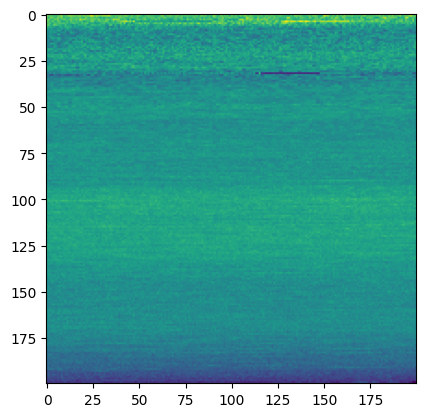

In [27]:
plt.imshow(rankavg - np.max(rankavg))

In [29]:
maxrow, maxcol = np.unravel_index(np.argmax(rankavg), rankavg.shape)
print("Best rank avg combination: " + str(maxrow) + " , " + str(maxcol))

Best rank avg combination: 1 , 24


In [32]:
flattened_arr = rankavg.flatten()

# Get the indexes of the 20 largest numbers
indexes = np.argpartition(flattened_arr, -20)[-20:]

# Convert flat indexes to row and column indexes
row_indexes, col_indexes = np.unravel_index(indexes, rankavg.shape)

print(row_indexes)
print(col_indexes)

[4 4 2 5 4 4 4 4 4 4 4 1 4 1 4 4 4 4 4 4]
[149 160 183  82 132  47 163 134  43 145 156 150 130  24 133 137 138 140
 141 129]
